In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load datasets

/Users/vrm6007/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
tag_df = pd.read_csv("Tag.csv")
tag_df.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,2009-04-24 18:19:40
1,65,208,dark hero,2013-05-10 01:41:18
2,65,353,dark hero,2013-05-10 01:41:19
3,65,521,noir thriller,2013-05-10 01:39:43
4,65,592,dark hero,2013-05-10 01:41:18


In [3]:
tag_df.shape

(465564, 4)

In [4]:
tag_df.isnull().sum()

userId        0
movieId       0
tag          16
timestamp     0
dtype: int64

In [5]:
# Handling Missing Values
#tag_df.fillna(value='', inplace=True)

tag_df.rename(columns={'tag':'user_tag'}, inplace=True)  #Changed the column name from tag to user_tag since it is a user given tag and shouldnt be confused with the genome tag columnin different dataset 

# Timestamp Handling
tag_df['timestamp'] = pd.to_datetime(tag_df['timestamp'])
tag_df['year'] = tag_df['timestamp'].dt.year
tag_df['month'] = tag_df['timestamp'].dt.month

# Tag Standardization

tag_df['user_tag'] = tag_df['user_tag'].str.lower()

In [6]:
print(tag_df.head())
tag_df.shape

   userId  movieId       user_tag           timestamp  year  month
0      18     4141    mark waters 2009-04-24 18:19:40  2009      4
1      65      208      dark hero 2013-05-10 01:41:18  2013      5
2      65      353      dark hero 2013-05-10 01:41:19  2013      5
3      65      521  noir thriller 2013-05-10 01:39:43  2013      5
4      65      592      dark hero 2013-05-10 01:41:18  2013      5


(465564, 6)

In [7]:
tag_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465564 entries, 0 to 465563
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   userId     465564 non-null  int64         
 1   movieId    465564 non-null  int64         
 2   user_tag   465548 non-null  object        
 3   timestamp  465564 non-null  datetime64[ns]
 4   year       465564 non-null  int64         
 5   month      465564 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 21.3+ MB


In [8]:
tag_df.user_tag.value_counts()

sci-fi                      3576
based on a book             3307
atmospheric                 3169
comedy                      3078
action                      3068
                            ... 
touchstone                     1
pg:some brief language         1
playwright:aaron sorkin        1
screenwriter:neil labute       1
topless scene                  1
Name: user_tag, Length: 35172, dtype: int64

In [9]:
#Top 10 user generated tags
tag_df.user_tag.value_counts().head(10)


sci-fi              3576
based on a book     3307
atmospheric         3169
comedy              3078
action              3068
nudity (topless)    2646
surreal             2528
twist ending        2367
bd-r                2334
funny               2253
Name: user_tag, dtype: int64

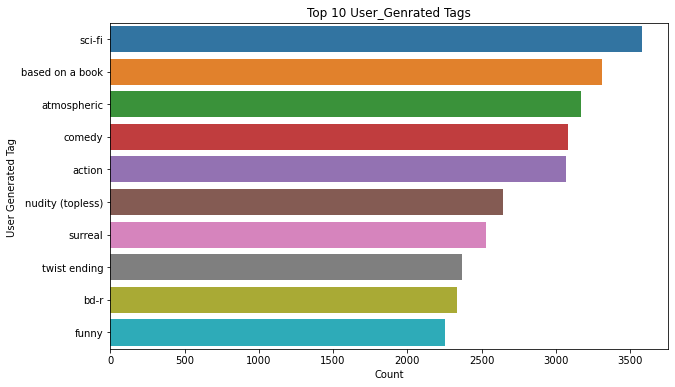

In [10]:
# Most Common user generated tags 
common_tags = tag_df['user_tag'].value_counts().head(10) 
plt.figure(figsize=(10,6))
sns.barplot(x=common_tags.values,y=common_tags.index, orient='h')
plt.title('Top 10 User_Genrated Tags')
plt.xlabel("Count")
plt.ylabel("User Generated Tag ")
plt.show()

In [11]:
rating_df = pd.read_csv("Rating.csv")
rating_df.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


In [12]:
rating_df.shape

(20000263, 4)

In [13]:
rating_df.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [14]:
# Timestamp Handling
rating_df['timestamp'] = pd.to_datetime(rating_df['timestamp'])
rating_df['year'] = rating_df['timestamp'].dt.year
rating_df['month'] = rating_df['timestamp'].dt.month


In [15]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000263 entries, 0 to 20000262
Data columns (total 6 columns):
 #   Column     Dtype         
---  ------     -----         
 0   userId     int64         
 1   movieId    int64         
 2   rating     float64       
 3   timestamp  datetime64[ns]
 4   year       int64         
 5   month      int64         
dtypes: datetime64[ns](1), float64(1), int64(4)
memory usage: 915.5 MB


In [16]:
print(rating_df.head())
rating_df.shape

   userId  movieId  rating           timestamp  year  month
0       1        2     3.5 2005-04-02 23:53:47  2005      4
1       1       29     3.5 2005-04-02 23:31:16  2005      4
2       1       32     3.5 2005-04-02 23:33:39  2005      4
3       1       47     3.5 2005-04-02 23:32:07  2005      4
4       1       50     3.5 2005-04-02 23:29:40  2005      4


(20000263, 6)

In [17]:
rating_df.rating.value_counts()

4.0    5561926
3.0    4291193
5.0    2898660
3.5    2200156
4.5    1534824
2.0    1430997
2.5     883398
1.0     680732
1.5     279252
0.5     239125
Name: rating, dtype: int64

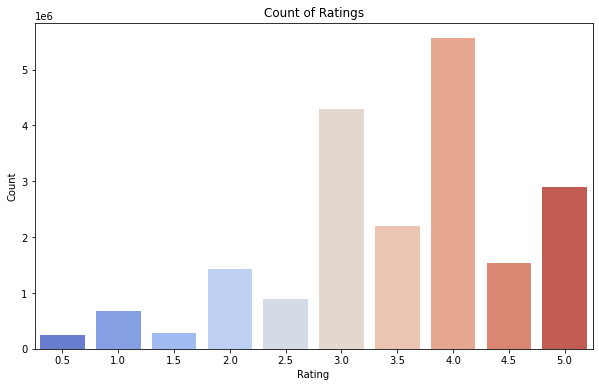

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot for rating
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=rating_df, palette='coolwarm')
plt.title('Count of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


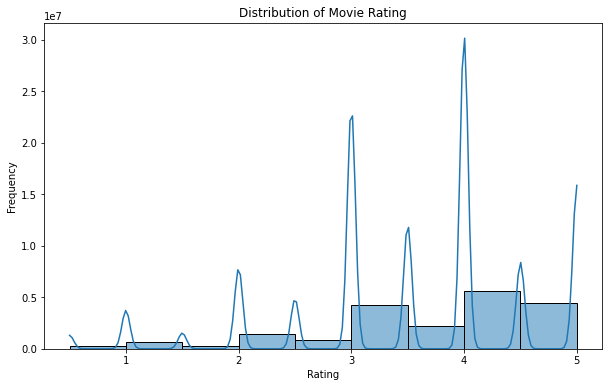

In [19]:
# Freq Distribution of Movie Rating
plt.figure(figsize=(10, 6))
sns.histplot(rating_df['rating'], bins=9, kde=True)
plt.title('Distribution of Movie Rating')
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

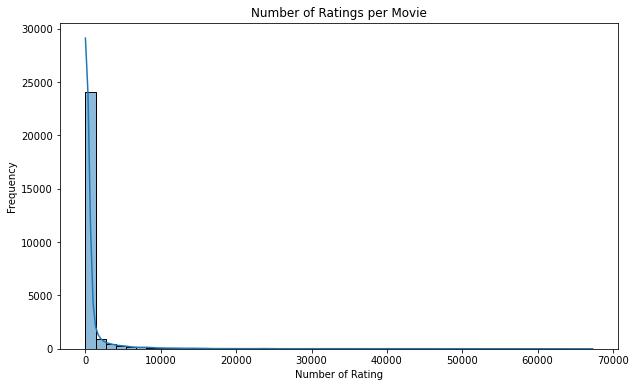

In [20]:
ratings_per_movie = rating_df.groupby('movieId')['rating'].count()
plt.figure(figsize=(10,6))
sns.histplot(ratings_per_movie, bins=50, kde=True)
plt.title('Number of Ratings per Movie')
plt.xlabel("Number of Rating")
plt.ylabel("Frequency")
plt.show()

In [21]:
movie_df = pd.read_csv("Movie.csv")

In [22]:
movie_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [23]:
movie_df.shape

(27278, 3)

In [24]:
movie_df.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [25]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  27278 non-null  int64 
 1   title    27278 non-null  object
 2   genres   27278 non-null  object
dtypes: int64(1), object(2)
memory usage: 639.5+ KB


In [26]:
# Genres Processing
movie_df['genres'] = movie_df['genres'].str.split('|') 
movie_df

,movieId,title,genres
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),[Comedy]
...,...,...,...
27273,131254,Kein Bund für's Leben (2007),[Comedy]
27274,131256,"Feuer, Eis & Dosenbier (2002)",[Comedy]
27275,131258,The Pirates (2014),[Adventure]
27276,131260,Rentun Ruusu (2001),[(no genres listed)]


In [27]:
#Creating this new dataframe for EDA purpose only 
movie_df_new = movie_df.copy()

# Extracted movie year and movie title into different columns
movie_df_new['release_year'] = movie_df['title'].str.extract(r'\((\d{4})\)', expand=False)
movie_df_new['movie_title'] = movie_df['title'].str.replace(r'\(\d{4}\)', '').str.strip()

# Genres Processing
movie_df_new['genres'] = movie_df_new['genres'].str.split('|')  

movie_df_new = movie_df_new.drop('title', axis=1)
movie_df_new = movie_df_new[['movieId', 'movie_title', 'release_year', 'genres']]

# Display the first few rows of the new DataFrame
movie_df_new.head(10)


/var/folders/bt/_bxgcdhj6z3_nfpmnzbyygj00000gn/T/ipykernel_6021/1104282470.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  movie_df_new['movie_title'] = movie_df['title'].str.replace(r'\(\d{4}\)', '').str.strip()


,movieId,movie_title,release_year,genres
0,1,Toy Story,1995,NaN
1,2,Jumanji,1995,NaN
2,3,Grumpier Old Men,1995,NaN
3,4,Waiting to Exhale,1995,NaN
4,5,Father of the Bride Part II,1995,NaN
5,6,Heat,1995,NaN
6,7,Sabrina,1995,NaN
7,8,Tom and Huck,1995,NaN
8,9,Sudden Death,1995,NaN
9,10,GoldenEye,1995,NaN


In [28]:
print(movie_df_new.head())
movie_df_new.shape

   movieId                  movie_title release_year  genres
0        1                    Toy Story         1995     NaN
1        2                      Jumanji         1995     NaN
2        3             Grumpier Old Men         1995     NaN
3        4            Waiting to Exhale         1995     NaN
4        5  Father of the Bride Part II         1995     NaN


(27278, 4)

In [29]:
movie_df_new.release_year.value_counts()

2009    1113
2012    1022
2011    1016
2013    1011
2008     979
        ... 
1893       1
1901       1
1903       1
1902       1
1891       1
Name: release_year, Length: 118, dtype: int64

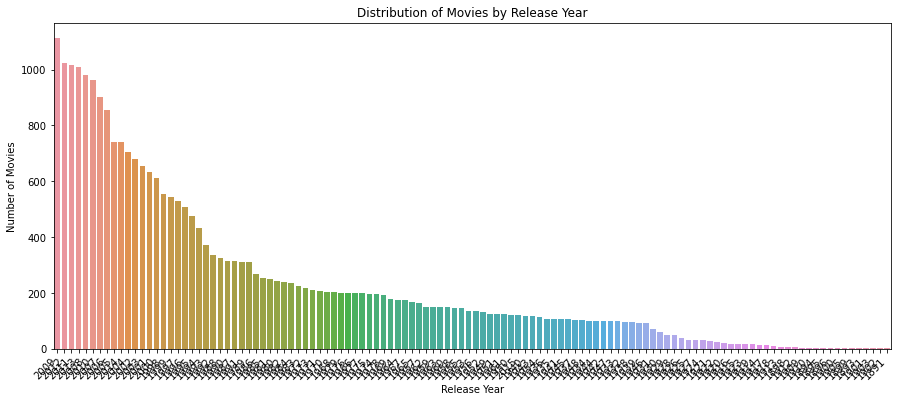

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 6))
sns.countplot(x='release_year', data=movie_df_new, order=movie_df_new['release_year'].value_counts().index)
plt.title('Distribution of Movies by Release Year')
plt.xlabel("Release Year")
plt.ylabel("Number of Movies")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()


In [31]:
movie_df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   movieId       27278 non-null  int64  
 1   movie_title   27278 non-null  object 
 2   release_year  27256 non-null  object 
 3   genres        0 non-null      float64
dtypes: float64(1), int64(1), object(2)
memory usage: 852.6+ KB


In [32]:
import pandas as pd

movie_df_new['release_year'] = pd.to_datetime(movie_df_new['release_year'], errors='coerce')


In [33]:
movie_df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   movieId       27278 non-null  int64         
 1   movie_title   27278 non-null  object        
 2   release_year  27256 non-null  datetime64[ns]
 3   genres        0 non-null      float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 852.6+ KB


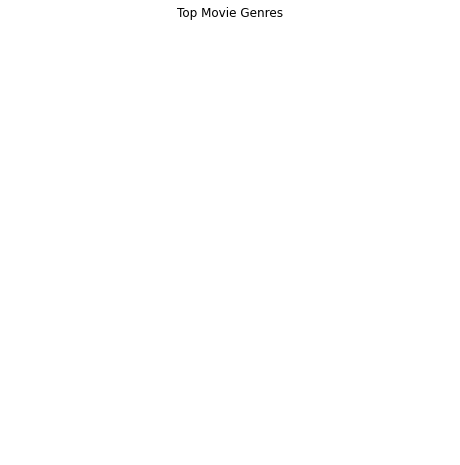

In [34]:

import seaborn as sns

# Define the color palette
a = plt.cm.cool

top_genres = movie_df_new['genres'].explode().value_counts().head(10)
colors = [a(0.1), a(0.2), a(0.3), a(0.4), a(0.5), a(0.6), a(0.7), a(0.8), a(0.9), a(0.99)]

# Create a pie chart with the specified colors
plt.figure(figsize=(8, 8))
plt.pie(top_genres.values, labels=top_genres.index, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Top Movie Genres')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


In [35]:
link_df = pd.read_csv("Link.csv")
link_df.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [36]:
link_df.shape

(27278, 3)

In [37]:
link_df.isnull().sum()

movieId      0
imdbId       0
tmdbId     252
dtype: int64

In [38]:
link_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  27278 non-null  int64  
 1   imdbId   27278 non-null  int64  
 2   tmdbId   27026 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 639.5 KB


In [39]:
link_df.describe()

,movieId,imdbId,tmdbId
count,27278.000000,2.727800e+04,27026.000000
mean,59855.480570,5.781860e+05,63846.683083
std,44429.314697,7.804707e+05,69862.134497
min,1.000000,5.000000e+00,2.000000
25%,6931.250000,7.741725e+04,15936.500000
50%,68068.000000,1.524350e+05,39468.500000
75%,100293.250000,9.062715e+05,82504.000000
max,131262.000000,4.530184e+06,421510.000000


In [40]:
genome_scores_df = pd.read_csv("Genome_scores.csv")
genome_scores_df.head()

,movieId,tagId,relevance
0,1,1,0.02500
1,1,2,0.02500
2,1,3,0.05775
3,1,4,0.09675
4,1,5,0.14675


In [41]:
genome_scores_df.shape

(11709768, 3)

In [42]:
genome_scores_df.isnull().sum()

movieId      0
tagId        0
relevance    0
dtype: int64

In [43]:
genome_scores_df.rename(columns={'tagId':'genome_tag_Id'}, inplace=True)  #Tag ID refers to genome tag ID

In [44]:
genome_scores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11709768 entries, 0 to 11709767
Data columns (total 3 columns):
 #   Column         Dtype  
---  ------         -----  
 0   movieId        int64  
 1   genome_tag_Id  int64  
 2   relevance      float64
dtypes: float64(1), int64(2)
memory usage: 268.0 MB


In [45]:
genome_scores_df.describe().round(2)

,movieId,genome_tag_Id,relevance
count,11709768.00,11709768.00,11709768.00
mean,25842.97,564.50,0.12
std,34676.15,325.63,0.15
min,1.00,1.00,0.00
25%,2926.00,282.75,0.02
50%,6017.00,564.50,0.06
75%,46062.00,846.25,0.14
max,131170.00,1128.00,1.00


In [46]:
genome_tags_df = pd.read_csv("Genome_tags.csv")
genome_tags_df

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s
...,...,...
1123,1124,writing
1124,1125,wuxia
1125,1126,wwii
1126,1127,zombie


In [47]:
genome_tags_df.shape

(1128, 2)

In [48]:
genome_tags_df.rename(columns={'tag':'genome_tag'}, inplace=True)   #This tag refers to genome tag therefore changed the columnname to genome_tag

genome_tags_df.rename(columns={'tagId':'genome_tag_Id'}, inplace=True)

In [49]:
genome_tags_df.isnull().sum()

genome_tag_Id    0
genome_tag       0
dtype: int64

In [50]:
genome_tags_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   genome_tag_Id  1128 non-null   int64 
 1   genome_tag     1128 non-null   object
dtypes: int64(1), object(1)
memory usage: 17.8+ KB


In [51]:
print(tag_df.head())
print(rating_df.head())
print(movie_df.head())
print(link_df.head())
print(genome_scores_df.head())
print(genome_tags_df.head())

   userId  movieId       user_tag           timestamp  year  month
0      18     4141    mark waters 2009-04-24 18:19:40  2009      4
1      65      208      dark hero 2013-05-10 01:41:18  2013      5
2      65      353      dark hero 2013-05-10 01:41:19  2013      5
3      65      521  noir thriller 2013-05-10 01:39:43  2013      5
4      65      592      dark hero 2013-05-10 01:41:18  2013      5
   userId  movieId  rating           timestamp  year  month
0       1        2     3.5 2005-04-02 23:53:47  2005      4
1       1       29     3.5 2005-04-02 23:31:16  2005      4
2       1       32     3.5 2005-04-02 23:33:39  2005      4
3       1       47     3.5 2005-04-02 23:32:07  2005      4
4       1       50     3.5 2005-04-02 23:29:40  2005      4
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhal

In [52]:

data = pd.merge(movie_df,rating_df, how='inner', on="movieId")

In [53]:
data

,movieId,title,genres,userId,rating,timestamp,year,month
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",3,4.0,1999-12-11 13:36:47,1999,12
1,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",6,5.0,1997-03-13 17:50:52,1997,3
2,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",8,4.0,1996-06-05 13:37:51,1996,6
3,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",10,4.0,1999-11-25 02:44:47,1999,11
4,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",11,4.5,2009-01-02 01:13:41,2009,1
...,...,...,...,...,...,...,...,...
20000258,131254,Kein Bund für's Leben (2007),[Comedy],79570,4.0,2015-03-30 19:32:59,2015,3
20000259,131256,"Feuer, Eis & Dosenbier (2002)",[Comedy],79570,4.0,2015-03-30 19:48:08,2015,3
20000260,131258,The Pirates (2014),[Adventure],28906,2.5,2015-03-30 19:56:32,2015,3
20000261,131260,Rentun Ruusu (2001),[(no genres listed)],65409,3.0,2015-03-30 19:57:46,2015,3


In [54]:
import numpy as np

def missing_values_analysis(data):
    na_columns = [col for col in data.columns if data[col].isnull().sum() > 0]
    n_miss = data[na_columns].isnull().sum().sort_values(ascending=True)
    ratio = (data[na_columns].isnull().sum() / data.shape[0] * 100).sort_values(ascending=True)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['Total Missing Values', 'Ratio'])
    missing_df = pd.DataFrame(missing_df)
    return missing_df

def check_df(data, row_num=5, col_num=10):
    print("*************** Dataset Shape ***************")
    print("No. of Rows:", data.shape[0], "\nNo. of Columns:", data.shape[1])
    print("*************** Dataset Information ***************")
    print(data.info())
    print("*************** Types of Columns ***************")
    print(data.dtypes)
    print(f"*************** First {row_num} Rows ***************")
    print(data.iloc[:row_num,:col_num])
    print(f"*************** Last {row_num} Rows ***************")
    print(data.iloc[-row_num:,:col_num])
    print("*************** Summary Statistics of The Dataset ***************")
    print(data.describe([0.10, 0.25, 0.50, 0.70, 0.80, 0.90, 0.95, 0.99]).T)
    print("*************** Dataset Missing Values Analysis ***************")
    print(missing_values_analysis(data))


check_df(data)


*************** Dataset Shape ***************
No. of Rows: 20000263 
No. of Columns: 8
*************** Dataset Information ***************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000263 entries, 0 to 20000262
Data columns (total 8 columns):
 #   Column     Dtype         
---  ------     -----         
 0   movieId    int64         
 1   title      object        
 2   genres     object        
 3   userId     int64         
 4   rating     float64       
 5   timestamp  datetime64[ns]
 6   year       int64         
 7   month      int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 1.3+ GB
None
*************** Types of Columns ***************
movieId               int64
title                object
genres               object
userId                int64
rating              float64
timestamp    datetime64[ns]
year                  int64
month                 int64
dtype: object
*************** First 5 Rows ***************
   movieId         

In [55]:
#This dataframeis just eda purpose only
eda_data = pd.merge(movie_df_new,rating_df, how='inner', on="movieId")
eda_data

,movieId,movie_title,release_year,genres,userId,rating,timestamp,year,month
0,1,Toy Story,1995-01-01,NaN,3,4.0,1999-12-11 13:36:47,1999,12
1,1,Toy Story,1995-01-01,NaN,6,5.0,1997-03-13 17:50:52,1997,3
2,1,Toy Story,1995-01-01,NaN,8,4.0,1996-06-05 13:37:51,1996,6
3,1,Toy Story,1995-01-01,NaN,10,4.0,1999-11-25 02:44:47,1999,11
4,1,Toy Story,1995-01-01,NaN,11,4.5,2009-01-02 01:13:41,2009,1
...,...,...,...,...,...,...,...,...,...
20000258,131254,Kein Bund für's Leben,2007-01-01,NaN,79570,4.0,2015-03-30 19:32:59,2015,3
20000259,131256,"Feuer, Eis & Dosenbier",2002-01-01,NaN,79570,4.0,2015-03-30 19:48:08,2015,3
20000260,131258,The Pirates,2014-01-01,NaN,28906,2.5,2015-03-30 19:56:32,2015,3
20000261,131260,Rentun Ruusu,2001-01-01,NaN,65409,3.0,2015-03-30 19:57:46,2015,3


In [56]:
eda_data.isnull().sum()

movieId                0
movie_title            0
release_year         405
genres          20000263
userId                 0
rating                 0
timestamp              0
year                   0
month                  0
dtype: int64

In [57]:

#Explore the most-rated movies

top_rated_movies = eda_data.groupby(['movie_title'])['rating'].mean().sort_values(ascending=False)
top_rated_movies


movie_title
Bandaged                                    5.0
Flight of the Conchords: A Texan Odyssey    5.0
Divorce                                     5.0
Sierra, La                                  5.0
1971                                        5.0
                                           ... 
Exit to Hell                                0.5
Quest for a Heart (Röllin sydän)            0.5
Excuse Me for Living                        0.5
Rabid Grannies (Mémés cannibales, Les)      0.5
Mega Piranha                                0.5
Name: rating, Length: 25718, dtype: float64

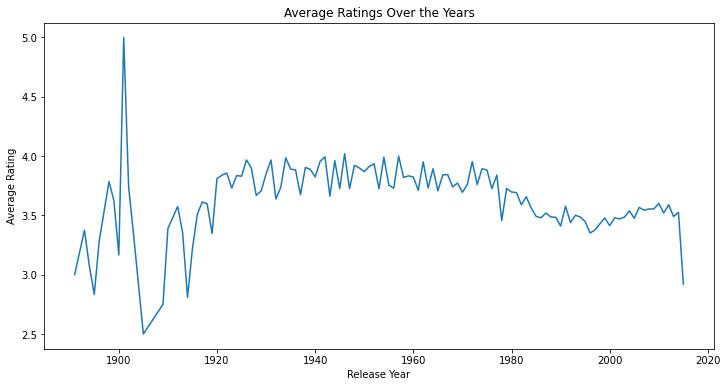

In [58]:
# Visualize Ratings Over the Years
plt.figure(figsize=(12, 6))
sns.lineplot(x='release_year', y='rating', data=eda_data.groupby('release_year')['rating'].mean().reset_index())
plt.title('Average Ratings Over the Years')
plt.xlabel("Release Year")
plt.ylabel("Average Rating")
plt.show()

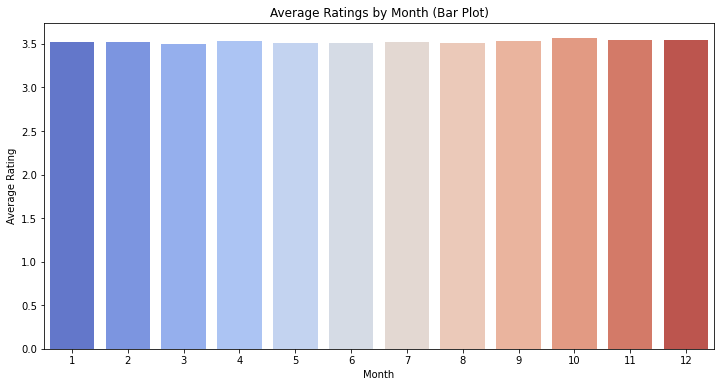

In [59]:
plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='rating', data=eda_data, ci=None, palette='coolwarm')
plt.title('Average Ratings by Month (Bar Plot)')
plt.xlabel("Month")
plt.ylabel("Average Rating")
plt.show()

In [60]:
#checking how many votes are given to a movie
num_rating_df = data.groupby('title').count()['rating'].reset_index()
num_rating_df.rename(columns={'rating':'num_ratings'},inplace=True)
num_rating_df

,title,num_ratings
0,#chicagoGirl: The Social Network Takes on a Di...,3
1,$ (Dollars) (1971),24
2,$5 a Day (2008),39
3,$9.99 (2008),55
4,$ellebrity (Sellebrity) (2012),2
...,...,...
26724,À propos de Nice (1930),4
26725,Árido Movie (2005),1
26726,Åsa-Nisse - Wälkom to Knohult (2011),2
26727,Üvegtigris (2001),1


In [61]:
#checking for average rating addition of all ratings divided by total no. of ratings
avg_rating_df = data.groupby('title')['rating'].mean().reset_index()
avg_rating_df.rename(columns={'rating':'avg_ratings'}, inplace=True)
avg_rating_df

,title,avg_ratings
0,#chicagoGirl: The Social Network Takes on a Di...,3.666667
1,$ (Dollars) (1971),2.833333
2,$5 a Day (2008),2.871795
3,$9.99 (2008),3.009091
4,$ellebrity (Sellebrity) (2012),2.000000
...,...,...
26724,À propos de Nice (1930),3.125000
26725,Árido Movie (2005),2.000000
26726,Åsa-Nisse - Wälkom to Knohult (2011),1.500000
26727,Üvegtigris (2001),3.000000


In [62]:
#checking for average rating addition of all ratings divided by total no. of ratings
avg_rating_df = data.groupby('title')['rating'].mean().reset_index()
avg_rating_df.rename(columns={'rating':'avg_ratings'}, inplace=True)
avg_rating_df

,title,avg_ratings
0,#chicagoGirl: The Social Network Takes on a Di...,3.666667
1,$ (Dollars) (1971),2.833333
2,$5 a Day (2008),2.871795
3,$9.99 (2008),3.009091
4,$ellebrity (Sellebrity) (2012),2.000000
...,...,...
26724,À propos de Nice (1930),3.125000
26725,Árido Movie (2005),2.000000
26726,Åsa-Nisse - Wälkom to Knohult (2011),1.500000
26727,Üvegtigris (2001),3.000000


In [63]:
popular_movies_df = num_rating_df.merge(avg_rating_df,on='title')
popular_movies_df

,title,num_ratings,avg_ratings
0,#chicagoGirl: The Social Network Takes on a Di...,3,3.666667
1,$ (Dollars) (1971),24,2.833333
2,$5 a Day (2008),39,2.871795
3,$9.99 (2008),55,3.009091
4,$ellebrity (Sellebrity) (2012),2,2.000000
...,...,...,...
26724,À propos de Nice (1930),4,3.125000
26725,Árido Movie (2005),1,2.000000
26726,Åsa-Nisse - Wälkom to Knohult (2011),2,1.500000
26727,Üvegtigris (2001),1,3.000000


In [64]:
#only keeping the movies which has ratings above 300
popular_movies_df = popular_movies_df[popular_movies_df['num_ratings']>=300].sort_values('avg_ratings',ascending=False).head(50)
popular_movies_df.merge(movie_df,on='title').drop_duplicates('title').shape

popular_movies_df

,title,num_ratings,avg_ratings
20779,"Shawshank Redemption, The (1994)",63366,4.446990
9586,"Godfather, The (1972)",41355,4.364732
24967,"Usual Suspects, The (1995)",47006,4.334372
20317,Schindler's List (1993),50054,4.310175
9587,"Godfather: Part II, The (1974)",27398,4.275641
20600,Seven Samurai (Shichinin no samurai) (1954),11611,4.274180
19203,Rear Window (1954),17449,4.271334
2072,Band of Brothers (2001),4305,4.263182
4236,Casablanca (1942),24349,4.258327
22420,Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),6525,4.256935


In [65]:
#Top 10 movies 
popular_movies_df.head(10)

,title,num_ratings,avg_ratings
20779,"Shawshank Redemption, The (1994)",63366,4.446990
9586,"Godfather, The (1972)",41355,4.364732
24967,"Usual Suspects, The (1995)",47006,4.334372
20317,Schindler's List (1993),50054,4.310175
9587,"Godfather: Part II, The (1974)",27398,4.275641
20600,Seven Samurai (Shichinin no samurai) (1954),11611,4.274180
19203,Rear Window (1954),17449,4.271334
2072,Band of Brothers (2001),4305,4.263182
4236,Casablanca (1942),24349,4.258327
22420,Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),6525,4.256935


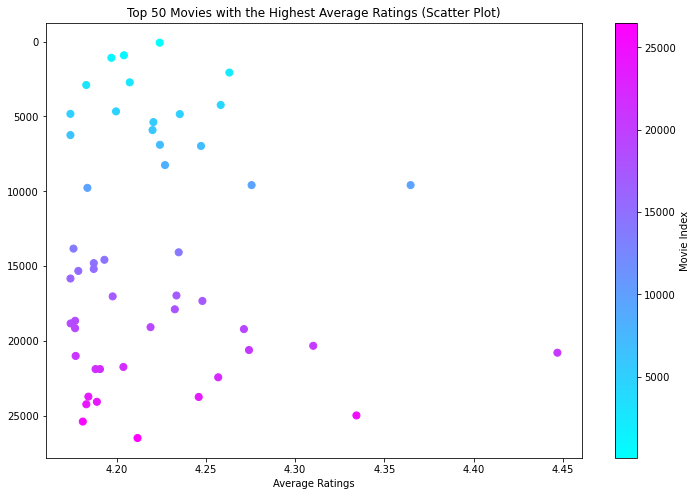

In [66]:
# Select the top 50 movies with the highest average ratings
top_50_movies = popular_movies_df.head(50)

# Create a scatter plot
plt.figure(figsize=(12, 8))
scatter = plt.scatter(top_50_movies['avg_ratings'], top_50_movies.index, c=top_50_movies.index, cmap='cool', s=50)
plt.xlabel('Average Ratings')
plt.title('Top 50 Movies with the Highest Average Ratings (Scatter Plot)')
plt.gca().invert_yaxis()  # Invert the y-axis to show the highest rating at the top
plt.colorbar(label='Movie Index', orientation='vertical')

plt.show()

In [69]:
!pip install torch torchvision torchaudio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.0/147.0 MB 11.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 13.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 11.5 MB/s eta 0:00:0000:0100:01


In [71]:
!pip install pytorch-lightning

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.9/776.9 kB 7.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 806.1/806.1 kB 11.5 MB/s eta 0:00:00a 0:00:01


In [72]:


import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import pytorch_lightning as pl

np.random.seed(123)

In [73]:
ratings = pd.read_csv('rating.csv', parse_dates=['timestamp'])

In [74]:
rand_userIds = np.random.choice(ratings['userId'].unique(), 
                                size=int(len(ratings['userId'].unique())*0.3), 
                                replace=False)

ratings = ratings.loc[ratings['userId'].isin(rand_userIds)]

print('There are {} rows of data from {} users'.format(len(ratings), len(rand_userIds)))

There are 6027314 rows of data from 41547 users


In [75]:
ratings.sample(5)

,userId,movieId,rating,timestamp
3840312,26182,3704,4.0,2007-01-31 21:56:52
7608731,52439,3365,4.0,2004-03-21 08:02:56
19363634,134060,1027,3.0,2003-07-15 22:43:45
17181947,118860,2629,1.0,2007-11-29 21:27:08
9344779,64638,4723,2.0,2001-09-10 20:11:41


In [76]:
ratings['rank_latest'] = ratings.groupby(['userId'])['timestamp'] \
                                .rank(method='first', ascending=False)

train_ratings = ratings[ratings['rank_latest'] != 1]
test_ratings = ratings[ratings['rank_latest'] == 1]

# drop columns that we no longer need
train_ratings = train_ratings[['userId', 'movieId', 'rating']]
test_ratings = test_ratings[['userId', 'movieId', 'rating']]

In [77]:
train_ratings.loc[:, 'rating'] = 1

train_ratings.sample(5)

,userId,movieId,rating
3411906,23263,5481,1
1815983,12245,5464,1
16198592,112109,6,1
13914487,96124,1247,1
1445807,9790,1690,1


In [78]:
# Get a list of all movie IDs
all_movieIds = ratings['movieId'].unique()

# Placeholders that will hold the training data
users, items, labels = [], [], []

# This is the set of items that each user has interaction with
user_item_set = set(zip(train_ratings['userId'], train_ratings['movieId']))

# 4:1 ratio of negative to positive samples
num_negatives = 4

for (u, i) in tqdm(user_item_set):
    users.append(u)
    items.append(i)
    labels.append(1) # items that the user has interacted with are positive
    for _ in range(num_negatives):
        # randomly select an item
        negative_item = np.random.choice(all_movieIds) 
        # check that the user has not interacted with this item
        while (u, negative_item) in user_item_set:
            negative_item = np.random.choice(all_movieIds)
        users.append(u)
        items.append(negative_item)
        labels.append(0) # items not interacted with are negative

  0%|          | 0/5985767 [00:00<?, ?it/s]

In [79]:
class MovieLensTrainDataset(Dataset):
    """MovieLens PyTorch Dataset for Training
    
    Args:
        ratings (pd.DataFrame): Dataframe containing the movie ratings
        all_movieIds (list): List containing all movieIds
    
    """

    def __init__(self, ratings, all_movieIds):
        self.users, self.items, self.labels = self.get_dataset(ratings, all_movieIds)

    def __len__(self):
        return len(self.users)
  
    def __getitem__(self, idx):
        return self.users[idx], self.items[idx], self.labels[idx]

    def get_dataset(self, ratings, all_movieIds):
        users, items, labels = [], [], []
        user_item_set = set(zip(ratings['userId'], ratings['movieId']))

        num_negatives = 4
        for u, i in user_item_set:
            users.append(u)
            items.append(i)
            labels.append(1)
            for _ in range(num_negatives):
                negative_item = np.random.choice(all_movieIds)
                while (u, negative_item) in user_item_set:
                    negative_item = np.random.choice(all_movieIds)
                users.append(u)
                items.append(negative_item)
                labels.append(0)

        return torch.tensor(users), torch.tensor(items), torch.tensor(labels)

In [80]:
class NCF(pl.LightningModule):
    """ Neural Collaborative Filtering (NCF)
    
        Args:
            num_users (int): Number of unique users
            num_items (int): Number of unique items
            ratings (pd.DataFrame): Dataframe containing the movie ratings for training
            all_movieIds (list): List containing all movieIds (train + test)
    """
    
    def __init__(self, num_users, num_items, ratings, all_movieIds):
        super().__init__()
        self.user_embedding = nn.Embedding(num_embeddings=num_users, embedding_dim=8)
        self.item_embedding = nn.Embedding(num_embeddings=num_items, embedding_dim=8)
        self.fc1 = nn.Linear(in_features=16, out_features=64)
        self.fc2 = nn.Linear(in_features=64, out_features=32)
        self.output = nn.Linear(in_features=32, out_features=1)
        self.ratings = ratings
        self.all_movieIds = all_movieIds
        
    def forward(self, user_input, item_input):
        
        # Pass through embedding layers
        user_embedded = self.user_embedding(user_input)
        item_embedded = self.item_embedding(item_input)

        # Concat the two embedding layers
        vector = torch.cat([user_embedded, item_embedded], dim=-1)

        # Pass through dense layer
        vector = nn.ReLU()(self.fc1(vector))
        vector = nn.ReLU()(self.fc2(vector))

        # Output layer
        pred = nn.Sigmoid()(self.output(vector))

        return pred
    
    def training_step(self, batch, batch_idx):
        user_input, item_input, labels = batch
        predicted_labels = self(user_input, item_input)
        loss = nn.BCELoss()(predicted_labels, labels.view(-1, 1).float())
        return loss

    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters())

    def train_dataloader(self):
        return DataLoader(MovieLensTrainDataset(self.ratings, self.all_movieIds),
                          batch_size=512, num_workers=4)

In [81]:
num_users = ratings['userId'].max()+1
num_items = ratings['movieId'].max()+1

all_movieIds = ratings['movieId'].unique()

model = NCF(num_users, num_items, train_ratings, all_movieIds)

In [88]:
import sys
print(sys.version)

3.9.12 (main, Apr  5 2022, 01:53:17) 
[Clang 12.0.0 ]


In [1]:
trainer = pl.Trainer(max_epochs=5, progress_bar_refresh_rate=50, logger=False, checkpoint_callback=False)

trainer.fit(model)


NameError: name 'pl' is not defined

In [ ]:
# User-item pairs for testing
test_user_item_set = set(zip(test_ratings['userId'], test_ratings['movieId']))

# Dict of all items that are interacted with by each user
user_interacted_items = ratings.groupby('userId')['movieId'].apply(list).to_dict()

hits = []
for (u,i) in tqdm(test_user_item_set):
    interacted_items = user_interacted_items[u]
    not_interacted_items = set(all_movieIds) - set(interacted_items)
    selected_not_interacted = list(np.random.choice(list(not_interacted_items), 99))
    test_items = selected_not_interacted + [i]
    
    predicted_labels = np.squeeze(model(torch.tensor([u]*100), 
                                        torch.tensor(test_items)).detach().numpy())
    
    top10_items = [test_items[i] for i in np.argsort(predicted_labels)[::-1][0:10].tolist()]
    
    if i in top10_items:
        hits.append(1)
    else:
        hits.append(0)
        
print("The Hit Ratio @ 10 is {:.2f}".format(np.average(hits)))